# Visualise Heatmaps

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Xmaster6y/lczerolens/blob/main/docs/source/notebooks/features/visualise-saliency-heatmaps.ipynb)

## Setup

In [1]:
MODE = "local"  # "colab" | "colab-dev" | "local"

In [2]:
if MODE == "colab":
    !pip install -q lczerolens
elif MODE == "colab-dev":
    !rm -r lczerolens
    !git clone https://github.com/Xmaster6y/lczerolens -b main
    !pip install -q ./lczerolens

In [3]:
!gdown 1CvMyX3KuYxCJUKz9kOb9VX8zIkfISALd -O lc0-19-4508.onnx
!gdown 1PB097ZKd_zTaPHxLK29WKUWmv6KcZ15T -O lc0.onnx

Downloading...
From: https://drive.google.com/uc?id=1CvMyX3KuYxCJUKz9kOb9VX8zIkfISALd
To: /Users/xmaster/Work/lczerolens/docs/source/notebooks/features/lc0-19-4508.onnx
100%|██████████████████████████████████████| 97.1M/97.1M [00:01<00:00, 49.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1PB097ZKd_zTaPHxLK29WKUWmv6KcZ15T
From (redirected): https://drive.google.com/uc?id=1PB097ZKd_zTaPHxLK29WKUWmv6KcZ15T&confirm=t&uuid=d1bc81a6-4ce3-4d23-ae2b-5c11d0e44993
To: /Users/xmaster/Work/lczerolens/docs/source/notebooks/features/lc0.onnx
100%|████████████████████████████████████████| 379M/379M [00:07<00:00, 52.8MB/s]


## Visualise Attention

In [4]:
from lczerolens import LczeroModel

transformer_model = LczeroModel.from_path("lc0.onnx")
transformer_model

/Users/xmaster/Work/lczerolens/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GraphModule(
  (attn_body/transpose): OnnxTranspose()
  (initializers): Module()
  (attn_body/reshape): OnnxReshape()
  (attn_body/shape): OnnxShape()
  (attn_body/batch): OnnxSlice()
  (attn_body/pos_encoding_shape): OnnxConcat()
  (attn_body/expand): OnnxExpand()
  (attn_body/padded_input): OnnxConcat()
  (attn_body/reshape2): OnnxReshape()
  (attn_body/matmul): OnnxMatMul()
  (attn_body/add): OnnxBinaryMathOperation()
  (attn_body/mish/softplus): Softplus(beta=1.0, threshold=20.0)
  (attn_body/mish/tanh): OnnxFunction()
  (attn_body/mish): OnnxBinaryMathOperation()
  (attn_body/ma_gating/rehape1): OnnxReshape()
  (ip_mul_gate): OnnxBinaryMathOperation()
  (ip_add_gate): OnnxBinaryMathOperation()
  (attn_body/ma_gating/rehape2): OnnxReshape()
  (encoder0/mha/Q/w): OnnxMatMul()
  (encoder0/mha/Q/b): OnnxBinaryMathOperation()
  (encoder0/mha/Q/reshape): OnnxReshape()
  (encoder0/mha/Q/transpose): OnnxTranspose()
  (encoder0/mha/K/w): OnnxMatMul()
  (encoder0/mha/K/b): OnnxBinaryMathOpe

In [5]:
from lczerolens import LczeroBoard
from lczerolens.lenses import ActivationLens

board = LczeroBoard(fen="1rb1rbk1/2qn1p1p/p2p2p1/1ppPp2n/PP2P3/2P1BN1P/R1BN1PP1/3QR1K1 w - - 0 22")
lens = ActivationLens("encoder\d+/mha/QK/softmax")
results = lens.analyse(transformer_model, board)
results.keys()

dict_keys(['encoder0/mha/QK/softmax_output', 'encoder1/mha/QK/softmax_output', 'encoder2/mha/QK/softmax_output', 'encoder3/mha/QK/softmax_output', 'encoder4/mha/QK/softmax_output', 'encoder5/mha/QK/softmax_output', 'encoder6/mha/QK/softmax_output', 'encoder7/mha/QK/softmax_output', 'encoder8/mha/QK/softmax_output', 'encoder9/mha/QK/softmax_output', 'encoder10/mha/QK/softmax_output', 'encoder11/mha/QK/softmax_output', 'encoder12/mha/QK/softmax_output', 'encoder13/mha/QK/softmax_output', 'encoder14/mha/QK/softmax_output'])

In [6]:
import chess
import IPython.display

batch_index = 0
layer = 9
head = 5
piece = chess.F3

attention_weights = results[f"encoder{layer}/mha/QK/softmax_output"][batch_index, head]
svg_board, svg_colorbar = board.render_heatmap(attention_weights[piece].detach())
display(IPython.display.HTML(f"{svg_board}{svg_colorbar}"))

## Visualise Gradients

In [7]:
cnn_model = LczeroModel.from_path("lc0-19-4508.onnx")
cnn_model

GraphModule(
  (inputconv): Conv2d(112, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (inputconv/relu): ReLU()
  (block0/conv1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (block0/conv1/relu): ReLU()
  (block0/conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (block0/conv2/se/pooled): OnnxGlobalAveragePoolWithKnownInputShape()
  (initializers): Module()
  (block0/conv2/se/squeeze): OnnxSqueezeDynamicAxes()
  (block0/conv2/se/matmul1): OnnxMatMul()
  (block0/conv2/se/add1): OnnxBinaryMathOperation()
  (block0/conv2/se/relu): ReLU()
  (block0/conv2/se/matmul2): OnnxMatMul()
  (block0/conv2/se/add2): OnnxBinaryMathOperation()
  (block0/conv2/se/reshape): OnnxReshape()
  (block0/conv2/se/split): OnnxSplit13()
  (block0/conv2/se/sigmoid): Sigmoid()
  (block0/conv2/se/mul): OnnxBinaryMathOperation()
  (block0/conv2/se/add3): OnnxBinaryMathOperation()
  (block0/conv2/mixin): OnnxBinaryMathOperation()
  (block0/conv2/relu): ReL

In [8]:
from lczerolens.lenses import GradientLens

lens = GradientLens(pattern="output/wdl|value/dense2/add")


def init_target(model):
    return getattr(model, "output/wdl").output[:, 0]


results = lens.analyse(cnn_model, board, init_target=init_target)
results.keys()

dict_keys(['input_grad', 'value/dense2/add_output_grad', 'output/wdl_output_grad'])

In [9]:
batch_index = 0
plane = 1  # N

svg_board, svg_colorbar = board.render_heatmap(
    results["input_grad"][batch_index, plane].view(64).detach(), normalise="abs"
)
display(IPython.display.HTML(f"{svg_board}{svg_colorbar}"))

In [10]:
gap_input_grad = results["input_grad"][:, :12].mean(dim=1)

svg_board, svg_colorbar = board.render_heatmap(gap_input_grad[batch_index].view(64).detach(), normalise="abs")
display(IPython.display.HTML(f"{svg_board}{svg_colorbar}"))

## GradCAM

In [11]:
from lczerolens.lenses import CompositeLens

board = LczeroBoard(fen="1rb1rbk1/2qn1p1p/p2p2p1/1ppPp2n/PP2P3/2P1BN1P/R1BN1PP1/3QR1K1 w - - 0 22")
pattern = "block18/conv2/relu|value/conv|policy/conv\d"

act_lens = ActivationLens(pattern)
grad_lens = GradientLens(pattern=pattern)
lens = CompositeLens([act_lens, grad_lens])

In [12]:
import einops
import torch.nn.functional as F


def compute_cam_heatmap(values, gradients):
    weights = einops.reduce(gradients, "b c h w -> b c", "mean")
    heatmap = einops.einsum(values, weights, "b c h w, b c -> b h w")
    return F.relu(heatmap)

### Loking at the value

In [13]:
import IPython.display

wdl_index = 0  # 0: win, 1: draw, 2: loss
block = "value/conv"  # "block18/conv2/relu" | "value/conv"


def init_target(model):
    return getattr(model, "value/dense2/add").output[:, wdl_index]


results = lens.analyse(cnn_model, board, init_target=init_target)

heatmap = compute_cam_heatmap(results[f"{block}_output"], results[f"{block}_output_grad"])
svg_board, svg_colorbar = board.render_heatmap(heatmap.view(64).detach(), normalise="abs")
display(IPython.display.HTML(f"{svg_board}{svg_colorbar}"))

### Looking at the policy

In [14]:
import torch
from lczerolens.play.sampling import PolicySampler

policy_sampler = PolicySampler(model=cnn_model)
utilities, legal_indices, _ = next(iter(policy_sampler.get_utilities([board])))

topk_indices = torch.topk(utilities, k=3).indices
utilities[topk_indices], legal_indices[topk_indices]

(tensor([2.9891, 2.5723, 2.2822]), tensor([286, 668,  72]))

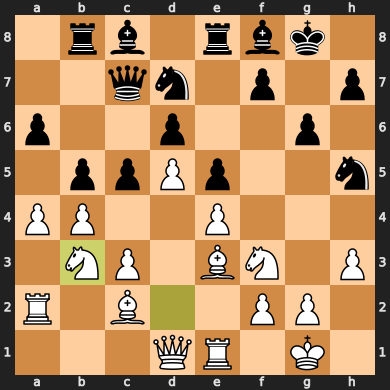

In [15]:
topk_index = 0

demo_board = LczeroBoard(fen="1rb1rbk1/2qn1p1p/p2p2p1/1ppPp2n/PP2P3/2P1BN1P/R1BN1PP1/3QR1K1 w - - 0 22")
move = demo_board.decode_move(legal_indices[topk_indices[topk_index]])
demo_board.push(move)
display(demo_board)

In [16]:
import IPython.display

policy_index = legal_indices[topk_indices[topk_index]]
block = "policy/conv2"  # "block18/conv2/relu" | "policy/conv1" | "policy/conv2"


def init_target(model):
    return getattr(model, "output/policy").output[:, policy_index]


results = lens.analyse(cnn_model, board, init_target=init_target)

heatmap = compute_cam_heatmap(results[f"{block}_output"], results[f"{block}_output_grad"])
svg_board, svg_colorbar = board.render_heatmap(heatmap.view(64).detach(), normalise="abs")
display(IPython.display.HTML(f"{svg_board}{svg_colorbar}"))